In [2]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

df = pd.read_csv('C01_l01_ecommerce_retail_data (1).csv')
df.head()

,row_id,customer_segment,order_amount_old,cost,is_return,payment_method,hour_of_day,date
0,0,standard,51.09,29.78,0,paypal,9,2024.12.05
1,1,standard,43.65,21.07,0,credit_card,19,2024.05.21
2,2,premium,94.39,55.24,0,credit_card,20,2024.12.06
3,3,platinum,232.82,172.68,0,credit_card,11,29-06-2024
4,4,premium,38.84,20.76,0,debit_card,10,12-01-2024


In [3]:
df.columns

Index(['row_id', 'customer_segment', 'order_amount_old', 'cost', 'is_return',
       'payment_method', 'hour_of_day', 'date'],
      dtype='object')

In [4]:
df.shape

(10286, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10286 entries, 0 to 10285
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            10286 non-null  int64  
 1   customer_segment  10286 non-null  object 
 2   order_amount_old  9978 non-null   float64
 3   cost              10286 non-null  float64
 4   is_return         10286 non-null  int64  
 5   payment_method    10286 non-null  object 
 6   hour_of_day       10286 non-null  int64  
 7   date              10286 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 643.0+ KB


In [6]:
df.isna().sum()

row_id                0
customer_segment      0
order_amount_old    308
cost                  0
is_return             0
payment_method        0
hour_of_day           0
date                  0
dtype: int64

In [7]:
df.customer_segment.value_counts()

customer_segment
standard    5902
premium     2452
platinum    1463
premuim      202
platnum      172
standrad      95
Name: count, dtype: int64

In [8]:
df.payment_method.value_counts()

payment_method
credit_card    6139
paypal         2091
debit_card     2056
Name: count, dtype: int64

In [9]:
df.describe()

,row_id,order_amount_old,cost,is_return,hour_of_day
count,10286.000000,9978.000000,10286.000000,10286.000000,10286.000000
mean,4996.047249,84.520973,45.568074,0.079526,14.847560
std,2884.995032,65.762068,42.672191,0.270570,4.223289
min,0.000000,5.000000,1.500000,0.000000,9.000000
25%,2502.250000,41.865000,18.420000,0.000000,11.000000
50%,4988.500000,65.210000,30.230000,0.000000,14.000000
75%,7491.750000,105.660000,56.887500,0.000000,19.000000
max,9999.000000,453.620000,291.440000,1.000000,22.000000


In [10]:
# parsing/converting the date column to proper date format

def parse_date(x):
    if pd.isna(x):
        return pd.NaT
    x = str(x).strip()
    # 1. YYYY-MM-DD
    if pd.Series(x).str.match(r'^\d{4}-\d{2}-\d{2}$')[0]:
        return pd.to_datetime(x, format='%Y-%m-%d', errors='coerce')
    # 2. DD-MM-YYYY or DD.MM.YYYY
    elif pd.Series(x).str.match(r'^\d{2}[-. ]\d{2}[-. ]\d{4}$')[0]:
        return pd.to_datetime(x.replace('.', '-'), format='%d-%m-%Y', errors='coerce')
    # 3. Fallback YYYY.MM.DD
    else:
        return pd.to_datetime(x.replace('.', '-'), format='%Y-%m-%d', errors='coerce')

df['parsed_dt'] = df['date'].apply(parse_date)

In [11]:
df.isna().sum()

row_id                0
customer_segment      0
order_amount_old    308
cost                  0
is_return             0
payment_method        0
hour_of_day           0
date                  0
parsed_dt             0
dtype: int64

In [12]:
# dropping the date column for the already cleaned parsed date to date

df['date'] = df['parsed_dt']
df = df.drop(columns=['parsed_dt'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10286 entries, 0 to 10285
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   row_id            10286 non-null  int64         
 1   customer_segment  10286 non-null  object        
 2   order_amount_old  9978 non-null   float64       
 3   cost              10286 non-null  float64       
 4   is_return         10286 non-null  int64         
 5   payment_method    10286 non-null  object        
 6   hour_of_day       10286 non-null  int64         
 7   date              10286 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 643.0+ KB


In [13]:
# extracting and creating year-month column from date column

df['year_month'] = df['date'].dt.strftime('%Y-%m')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10286 entries, 0 to 10285
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   row_id            10286 non-null  int64         
 1   customer_segment  10286 non-null  object        
 2   order_amount_old  9978 non-null   float64       
 3   cost              10286 non-null  float64       
 4   is_return         10286 non-null  int64         
 5   payment_method    10286 non-null  object        
 6   hour_of_day       10286 non-null  int64         
 7   date              10286 non-null  datetime64[ns]
 8   year_month        10286 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 723.4+ KB


In [14]:
# Create a mapping dictionary for simple replacements
segment_map = {
    'standrad': 'standard',
    'standard': 'standard',
    'premuim': 'premium',
    'premium': 'premium',
    'platnum': 'platinum',
    'platinum': 'platinum'
}

# Apply mapping; keep NaN as NaN and everything else unchanged
df['customer_segment'] = df['customer_segment'].map(segment_map).fillna(df['customer_segment'])

df.customer_segment.value_counts()


customer_segment
standard    5997
premium     2654
platinum    1635
Name: count, dtype: int64

In [15]:
# dropping null values

df_clean = df.dropna().copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9978 entries, 0 to 10285
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   row_id            9978 non-null   int64         
 1   customer_segment  9978 non-null   object        
 2   order_amount_old  9978 non-null   float64       
 3   cost              9978 non-null   float64       
 4   is_return         9978 non-null   int64         
 5   payment_method    9978 non-null   object        
 6   hour_of_day       9978 non-null   int64         
 7   date              9978 non-null   datetime64[ns]
 8   year_month        9978 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 779.5+ KB


In [16]:
# dropping duplicates values

df_clean = df_clean.drop_duplicates()

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9720 entries, 0 to 10247
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   row_id            9720 non-null   int64         
 1   customer_segment  9720 non-null   object        
 2   order_amount_old  9720 non-null   float64       
 3   cost              9720 non-null   float64       
 4   is_return         9720 non-null   int64         
 5   payment_method    9720 non-null   object        
 6   hour_of_day       9720 non-null   int64         
 7   date              9720 non-null   datetime64[ns]
 8   year_month        9720 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 759.4+ KB


In [17]:
df_clean.isna().sum()

row_id              0
customer_segment    0
order_amount_old    0
cost                0
is_return           0
payment_method      0
hour_of_day         0
date                0
year_month          0
dtype: int64

# EDA -
## To calculute for all KPIs

In [18]:
df_clean.describe()

,row_id,order_amount_old,cost,is_return,hour_of_day,date
count,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720
mean,5003.282716,84.443626,45.617521,0.079938,14.849383,2024-07-01 18:21:20
min,0.000000,5.000000,1.500000,0.000000,9.000000,2024-01-01 00:00:00
25%,2504.750000,41.940000,18.467500,0.000000,11.000000,2024-03-30 00:00:00
50%,5006.500000,65.245000,30.170000,0.000000,14.000000,2024-07-03 00:00:00
75%,7499.250000,105.615000,56.815000,0.000000,19.000000,2024-10-04 00:00:00
max,9999.000000,453.620000,291.440000,1.000000,22.000000,2024-12-30 00:00:00
std,2884.609644,65.628029,42.783425,0.271212,4.226622,NaN


In [19]:
# kpi_1 - Average Order Value - AOV

kp_1 = pd.DataFrame({
    'kpi_name': ['kpi_1'],
    'kpi_value': [round(df_clean.order_amount_old.mean(), 2).astype(str)],
    'kpi_key': [None]
})

kp_1

,kpi_name,kpi_value,kpi_key
0,kpi_1,84.44,None


In [20]:
# ALTERNATIVELY OR ANOTHER WAY

import pandas as pd

kpi_1 = pd.DataFrame({
    'kpi_name': ['kpi_1'],
    'kpi_value': [round(df_clean['order_amount_old'].mean(), 2)],
    'kpi_key': ['None']
})

# Match VARCHAR behavior
kpi_1['kpi_value'] = kpi_1['kpi_value'].astype(str)
kpi_1['kpi_key'] = kpi_1['kpi_key'].astype('string')

kpi_1

,kpi_name,kpi_value,kpi_key
0,kpi_1,84.44,None


In [21]:
# kpi_2 - Overall Gross Margin

kpi_2 = pd.DataFrame({
    'kpi_name': ['kpi_2'],
    'kpi_value': [str(round((df_clean.order_amount_old.sum() - df_clean.cost.sum()) / df_clean.order_amount_old.sum(), 6))],
    'kpi_key': ['None']
})

kpi_2

,kpi_name,kpi_value,kpi_key
0,kpi_2,0.459787,None


In [22]:
# kpi_3 - Return Rate %%!

kpi_3 = pd.DataFrame({
    'kpi_name': ['kpi_3'],
    'kpi_value': [str(round(df_clean.is_return.sum() / len(df_clean), 6))],
    'kpi_key': ['None']
})

kpi_3

,kpi_name,kpi_value,kpi_key
0,kpi_3,0.079938,None


In [23]:
# kpi_4 Median Order Amount

kpi_4 = pd.DataFrame({
    'kpi_name': ['kpi_4'],
    'kpi_value': [str(round(df_clean.order_amount_old.median(), 2))],
    'kpi_key': ['None']
})

kpi_4

,kpi_name,kpi_value,kpi_key
0,kpi_4,65.25,None


In [24]:
# kpi_5 - Return Rate by Payment method

kpi_5 = (
        df_clean
        .groupby('payment_method')
        .agg(
            kpi_value = ('is_return', lambda x: round(x.sum() / len(x), 6))
            )
            .reset_index()
            .sort_values(by='kpi_value', ascending=False)
        )

# assigning values/variable type
kpi_5['kpi_name'] = 'kpi_5'
kpi_5['kpi_value'] = kpi_5.kpi_value.astype(str)
kpi_5['kpi_key'] = kpi_5.payment_method.astype(str)

# Selecting final columns (order matters)
kpi_5 = kpi_5[['kpi_name', 'kpi_value', 'kpi_key']]
kpi_5

,kpi_name,kpi_value,kpi_key
2,kpi_5,0.080752,paypal
0,kpi_5,0.08044,credit_card
1,kpi_5,0.0776,debit_card


#### ALTERNATIVELY:

In [25]:
kpi_55 = (
    df_clean
    .groupby('payment_method', dropna=False)['is_return']
    .mean()
    .round(6)
    .astype(str)
    .reset_index(name='kpi_value')
    .sort_values(by='kpi_value', ascending=False)
)

kpi_55['kpi_name'] = 'kpi_55'
kpi_55['kpi_key'] = kpi_55['payment_method'].astype(str)

kpi_55 = kpi_55[['kpi_name', 'kpi_value', 'kpi_key']]

kpi_55

,kpi_name,kpi_value,kpi_key
2,kpi_55,0.080752,paypal
0,kpi_55,0.08044,credit_card
1,kpi_55,0.0776,debit_card


In [26]:
# kpi_6 - High-Value Segment GMV Share

# calculating the various GMVs
total_gmv = df_clean.order_amount_old.sum()
hv_gmv = df_clean.loc[df_clean['customer_segment'].isin(['premium', 'platinum']), 'order_amount_old'].sum()

# kpi_value
kpi_6_value = round(hv_gmv / total_gmv, 6)

kpi_6 = pd.DataFrame({
    'kpi_name': ['kpi_6'],
    'kpi_value': [str(kpi_6_value)],
    'kpi_key': ['None']
})

kpi_6

,kpi_name,kpi_value,kpi_key
0,kpi_6,0.64909,None


In [27]:
# kpi_7 - Below-Target Margin Rate

df_base = df_clean[['customer_segment', 'order_amount_old', 'cost']].copy()
df_base['gross_margin'] = (df_base.order_amount_old - df_base.cost) / df_base.order_amount_old

# eligible below target margins...
df_eligible = df_base[df_base['customer_segment'].isin(['standard', 'premium', 'platinum'])].copy()

# floor margin
fm = {
    'standard': 0.40,
    'premium': 0.30,
    'platinum': 0.25
}
df_eligible['floor_margin'] = df_eligible['customer_segment'].map(fm)

## checking for floor fails
df_eligible['floor_fails'] = (
    ((df_eligible['customer_segment'] == 'platinum') & (df_eligible['gross_margin'] <= df_eligible['floor_margin'])) |
    ((df_eligible['customer_segment'].isin(['standard', 'premium'])) & (df_eligible['gross_margin'] < df_eligible['floor_margin']))
).astype(int)

# calculating kpi_value
kpi_7_value = round(df_eligible['floor_fails'].sum() / len(df_eligible), 6)


kpi_7 = pd.DataFrame({
    'kpi_name': ['kpi_7'],
    'kpi_value': [str(kpi_7_value)],
    'kpi_key': ['None']
})

kpi_7

,kpi_name,kpi_value,kpi_key
0,kpi_7,0.002881,None


In [28]:
# kpi_8 - Top GMV Month

# getting monthly gmv
month_gmv = df_clean.groupby('year_month')['order_amount_old'].sum()
top_month_gmv = month_gmv.reset_index().sort_values(by='order_amount_old', ascending=False).head(1)
top_month_gmv = top_month_gmv.year_month.iloc[0]

kpi_8 = pd.DataFrame({
    'kpi_name': ['kpi_8'],
    'kpi_value': [str(top_month_gmv)],
    'kpi_key': ['None']
})

kpi_8

,kpi_name,kpi_value,kpi_key
0,kpi_8,2024-12,None


In [29]:
# kpi_9 - Latest Month-over-Month (MoM) GMV growth %

month_gmv = df_clean.groupby('year_month')['order_amount_old'].sum().sort_index()

# Adding previous month's GMV
month_gmv_df = month_gmv.to_frame(name='gmv') #converts the series to a dataframe with the column name 'gmv'
month_gmv_df['prev_gmv'] = month_gmv_df['gmv'].shift(1)

# gettting for latest month
latest_mon = month_gmv_df.iloc[-1]

kpi_9_value = round((latest_mon['gmv'] - latest_mon['prev_gmv']) / latest_mon['prev_gmv'], 6)

kpi_9 = pd.DataFrame({
    'kpi_name': ['kpi_9'],
    'kpi_value': [str(kpi_9_value)],
    'kpi_key': ['None']
})

kpi_9

,kpi_name,kpi_value,kpi_key
0,kpi_9,0.080437,None


In [30]:
# kpi_10 - Max payment mix shift
# Max Month-to-Month Payment-Method Share Shift (pp) - The largest % point change in any single payment method's ...
# ... order share from one month to the next

# counting number of orders per month
count_orders = df_clean.groupby(['year_month', 'payment_method']).size().reset_index(name='n')

# total number of orders per month
totals = count_orders.groupby('year_month')['n'].sum().reset_index(name='total')

# merging order counts with totals to compute shares
shares = count_orders.merge(totals, on='year_month')
shares['share'] = shares['n'] / shares['total']

# Compute absolute month-over-month differences per payment method
shares = shares.sort_values(['payment_method', 'year_month'])
shares['prev_share'] = shares.groupby('payment_method')['share'].shift(1)
shares['diff'] = (shares['share'] - shares['prev_share']).abs()

kpi_10_value = round(shares['diff'].max(), 6)

kpi_10 = pd.DataFrame({
    'kpi_name': ['kpi_10'],
    'kpi_value': [str(kpi_10_value)],
    'kpi_key': ['None']
})

kpi_10

,kpi_name,kpi_value,kpi_key
0,kpi_10,0.041082,None


#### JOINING ALL KPIs

In [31]:
all_kpis = [kp_1, kpi_2, kpi_3, kpi_4, kpi_5, kpi_6, kpi_7, kpi_8, kpi_9, kpi_10]

kpis_final = pd.concat(all_kpis, ignore_index=True)

kpis_final

,kpi_name,kpi_value,kpi_key
0,kpi_1,84.44,None
1,kpi_2,0.459787,None
2,kpi_3,0.079938,None
3,kpi_4,65.25,None
4,kpi_5,0.080752,paypal
5,kpi_5,0.08044,credit_card
6,kpi_5,0.0776,debit_card
7,kpi_6,0.64909,None
8,kpi_7,0.002881,None
9,kpi_8,2024-12,None


In [32]:
# Checking how many years are present in the dataset

sorted(df_clean['date'].dt.year.unique())


[np.int32(2024)]

In [33]:
df_clean['date'].dt.year.value_counts().sort_index()


date
2024    9720
Name: count, dtype: int64

In [34]:
# getting the respective month names

df_clean['year_month_name'] = (
    pd.to_datetime(df_clean['year_month'], format='%Y-%m')
      .dt.strftime('%B')
)


df_clean[['year_month', 'year_month_name']].head()

,year_month,year_month_name
0,2024-12,December
1,2024-05,May
2,2024-12,December
3,2024-06,June
4,2024-01,January


In [35]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

df_clean['year_month_name'] = pd.Categorical(
    df_clean['year_month_name'],
    categories=month_order,
    ordered=True
)


### VISUALIZATION

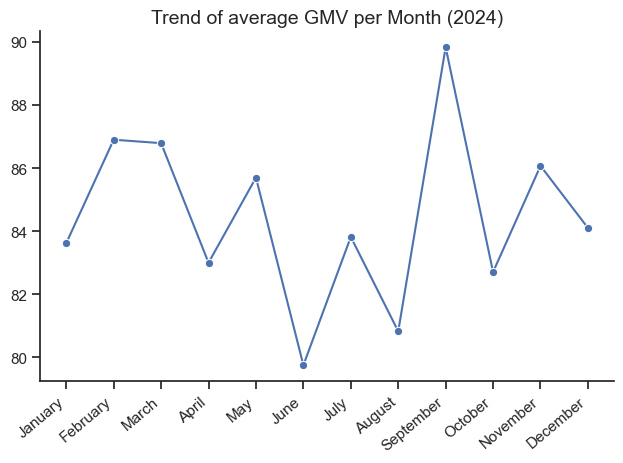

In [36]:
# 1. Trend of Average GMV per Month

df_clean = df_clean.sort_values('year_month_name')

sns.set_theme(style='ticks')

ax = sns.lineplot(data=df_clean, x='year_month_name', y='order_amount_old', errorbar=None, marker='o')
sns.despine()
plt.title('Trend of average GMV per Month (2024)', fontdict={'size':14})
plt.ylabel('')
plt.xlabel('')

plt.xticks(rotation=40, ha='right')

plt.tight_layout()
plt.show()

C:\Users\spyth\AppData\Local\Temp\ipykernel_22148\3407625.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('year_month_name', as_index=False)['order_amount_old']


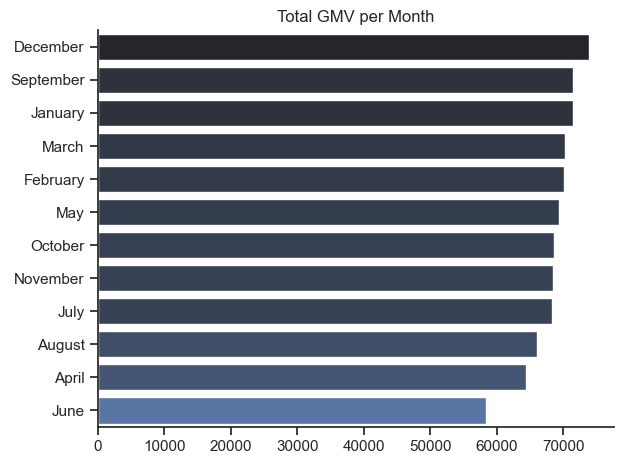

In [37]:
# 2. Barplot of Total GMV per Month

monthly_gmv = (
    df_clean
    .groupby('year_month_name', as_index=False)['order_amount_old']
    .sum()
)

# sorting the values
month_gmv_sorted = monthly_gmv.sort_values(by='order_amount_old', ascending=False)


sns.set_theme(style='ticks')
ax = sns.barplot(
    data=month_gmv_sorted, 
    x='order_amount_old', y='year_month_name',  
    order=month_gmv_sorted['year_month_name'], 
    hue='order_amount_old', 
    palette='dark:b_r'
)

sns.despine()
plt.title('Total GMV per Month')
plt.ylabel('')
plt.xlabel('')

ax.legend().remove()
plt.tight_layout()
plt.show()

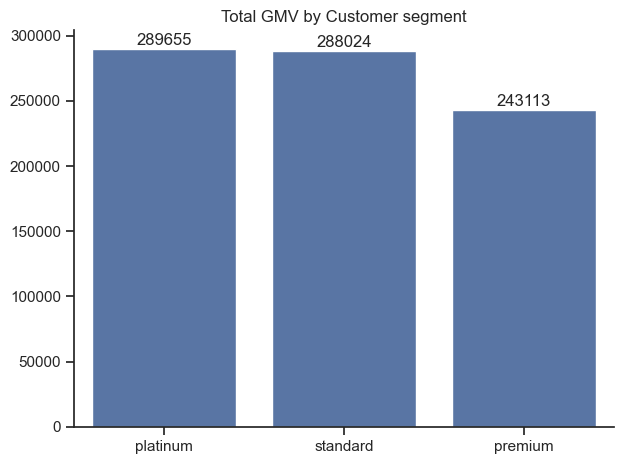

In [38]:
# 3. Total gmv by Customer segment

customer_gmv = df_clean.groupby('customer_segment', as_index=False)['order_amount_old'].sum()
customer_gmv_sorted = customer_gmv.sort_values(by='order_amount_old', ascending=False)

sns.set_theme(style='ticks')
ax = sns.barplot(data=customer_gmv_sorted, x='customer_segment', y='order_amount_old')
sns.despine()
plt.title('Total GMV by Customer segment')
plt.ylabel('')
plt.xlabel('')

for container in ax.containers:
    ax.bar_label(container, padding=1)

plt.tight_layout()
plt.show()

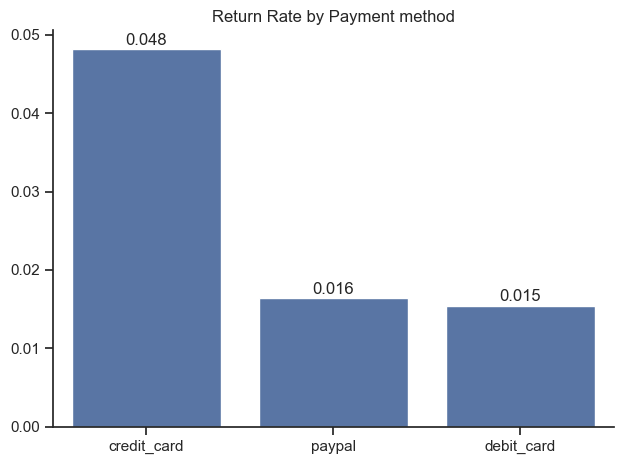

In [39]:
# 4. return rate by payment method

df_return = df_clean.groupby('payment_method', as_index=False)['is_return'].sum()
df_return['return_rate'] = df_return.is_return/len(df_clean)
df_return = df_return.sort_values(by='return_rate')[::-1]

sns.set_theme(style='ticks')
ax = sns.barplot(data=df_return, x='payment_method', y='return_rate')
sns.despine()
plt.title('Return Rate by Payment method')
plt.ylabel('')
plt.xlabel('')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=1)

plt.tight_layout()
plt.show()

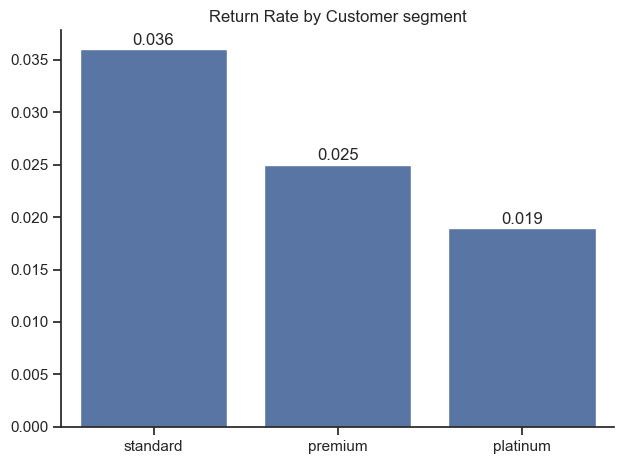

In [45]:
# 5. return rate by customer_segment

df_return = df_clean.groupby('customer_segment', as_index=False)['is_return'].sum()
df_return['return_rate'] = df_return.is_return/len(df_clean)
df_return = df_return.sort_values(by='return_rate')[::-1]

sns.set_theme(style='ticks')
ax = sns.barplot(data=df_return, x='customer_segment', y='return_rate')
sns.despine()
plt.title('Return Rate by Customer segment')
plt.ylabel('')
plt.xlabel('')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=1)

plt.tight_layout()
plt.show()

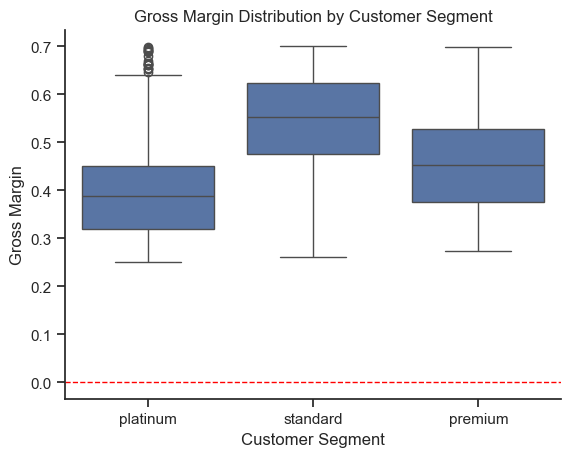

In [47]:
# 6. gross margin distribution by customer segment -- mirroring KPI_7

df_base = df_clean[['customer_segment', 'order_amount_old', 'cost']].copy()
df_base['gross_margin'] = (df_base.order_amount_old - df_base.cost) / df_base.order_amount_old


ax = sns.boxplot(data=df_base, x='customer_segment', y='gross_margin')
sns.despine()

ax.axhline(0, color='red', linestyle='--', linewidth=1)

plt.title("Gross Margin Distribution by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Gross Margin")


plt.show()